# Debubbing RMSE

In [15]:
# imports
import os
import numpy as np

import seaborn as sns
import h5py

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# Load 

## Table

In [3]:
valid_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Tables', 'MAE_LLC_valid_nonoise.parquet')

In [4]:
llc_tbl = ulmo_io.load_main_table(valid_file)

Read main table: /home/xavier/Projects/Oceanography/OGCM/LLC/Enki/Tables/MAE_LLC_valid_nonoise.parquet


In [8]:
llc_tbl.keys()

Index(['lat', 'lon', 'row', 'col', 'datetime', 'filename', 'pp_file',
       'pp_root', 'field_size', 'pp_idx', 'pp_type', 'mean_temperature',
       'Tmin', 'Tmax', 'T90', 'T10', 'LL', 'LL_t75_p10', 'LL_t75_p20',
       'LL_t75_p30', 'LL_t75_p40', 'LL_t75_p50', 'LL_t10_p10', 'LL_t10_p20',
       'LL_t10_p30', 'LL_t10_p40', 'LL_t10_p50', 'LL_t35_p10', 'LL_t35_p20',
       'LL_t35_p30', 'LL_t35_p40', 'LL_t35_p50', 'RMS_t10_p10', 'RMS_t10_p20',
       'RMS_t10_p30', 'RMS_t10_p40', 'RMS_t10_p50', 'RMS_t35_p10',
       'RMS_t35_p20', 'RMS_t35_p30', 'RMS_t35_p40', 'RMS_t35_p50',
       'RMS_t75_p10', 'RMS_t75_p20', 'RMS_t75_p30', 'RMS_t75_p40',
       'RMS_t75_p50', 'DT', 'RMS_t50_p10', 'RMS_t50_p20', 'RMS_t50_p30',
       'RMS_t50_p40', 'RMS_t50_p50'],
      dtype='object')

## Images

In [14]:
orig_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'PreProc', 'MAE_LLC_valid_nonoise_preproc.h5')
f_orig = h5py.File(orig_file, 'r')

# Quick plot

## $\Delta T$

<Axes: xlabel='DT', ylabel='LL'>

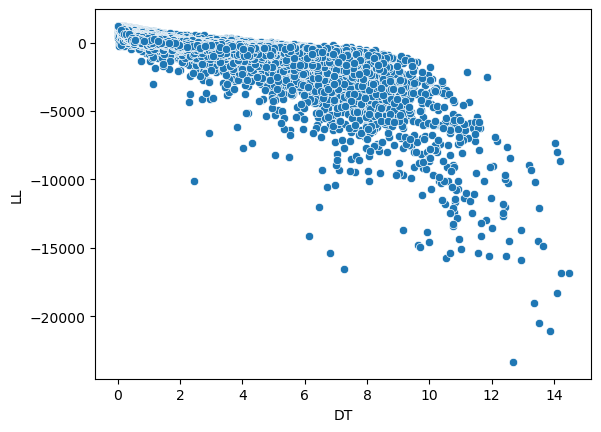

In [7]:
sns.scatterplot(llc_tbl, x='DT', y='LL')

## RMSE 50

<Axes: xlabel='RMS_t50_p50', ylabel='LL'>

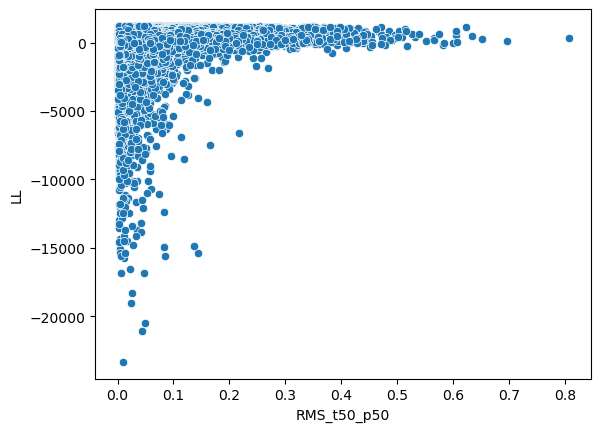

In [9]:
sns.scatterplot(llc_tbl, x='RMS_t50_p50', y='LL')

# Check for high $\Delta T$

In [21]:
hiT = np.argmax(llc_tbl.DT)
print(hiT)
llc_tbl.iloc[hiT]

354315


lat                                                         43.011658
lon                                                         -48.59375
row                                                             10371
col                                                             16739
datetime                                          2012-03-31 00:00:00
filename            /data/Projects/Oceanography/data/LLC/ThetaUVSa...
pp_file                 s3://llc/mae/Recon/mae_reconstruct_t35_p50.h5
pp_root                                               llc_144_nonoise
field_size                                                         64
pp_idx                                                         314158
pp_type                                                             0
mean_temperature                                             8.134077
Tmin                                                        -0.516001
Tmax                                                           14.555
T90                 

In [16]:
img = f_orig['valid'][llc_tbl.iloc[hiT].pp_idx,0,...]
img.shape

(64, 64)

<Axes: >

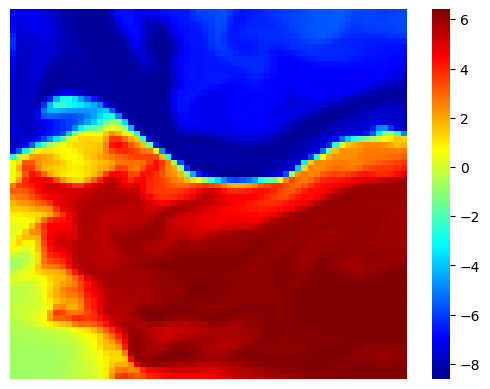

In [17]:
plotting.show_image(img)

# Open a reconstructed image

In [18]:
recon_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki', 'Recon', 'mae_reconstruct_t50_p30.h5')
f_recon = h5py.File(recon_file, 'r')

In [19]:
img_r = f_recon['valid'][llc_tbl.iloc[hiT].pp_idx,0,...]

### Show

<Axes: >

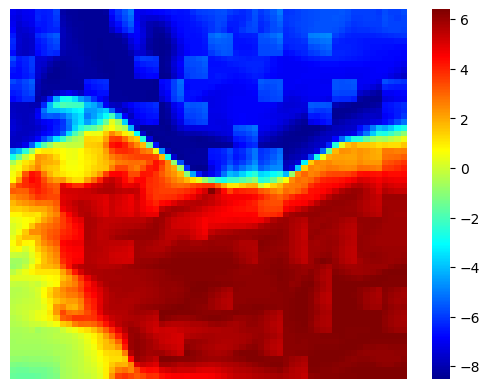

In [20]:
plotting.show_image(img_r)